In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing boston housing prices from sklearns library
from sklearn.datasets import load_boston

# setting style for visualizations
sns.set_style('darkgrid')
%matplotlib inline

# Loading Boston Housing Data from Sklearn

In [2]:
# loading dataset into boston variable
boston = load_boston()
# brief infomation about the boston dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### *The goal is to produce a Linear Regression model that can accurately predict the price (continious variable) of a house in Boston based on multiple features. The model should have a high r2-score, low mean-squared-error, low mean-absolute-error and  it must be robust to outliears (low median-absolute-error).*

# Data Preprocessing 

In [3]:
# keys used to access certain aspects of dataset
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# extracing feature and target variables from boston
data = boston.data
target = boston.target

print(data.shape)
print(target.shape)

(506, 13)
(506,)


In [5]:
# column names
feature_names = boston.feature_names
print(feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# creating dataframe of dataset
df = pd.DataFrame(data, columns=feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# adding target variable to the dataframe
df['PRICE'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [9]:
# identifying missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# Exploratory Data Analysis

In [10]:
# identify the correlation that features have with price
df.corr()['PRICE'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
PRICE      1.000000
Name: PRICE, dtype: float64

**Notes on correlation:**   

* 'LSTAT', the higher the proportion lower class areas, the lower the price will be. (Strong Negative Correlation)  
* 'PTRATIO', areas that contain more students than teacher have a negative correlation with house prices  
* 'INDUS', higher areas of non-retail business acres have a negative correlation with price   
* 'RM', the price of house has a strong positive correlation with the number of rooms in a house 

#### Lower Class Area analysis with House Price

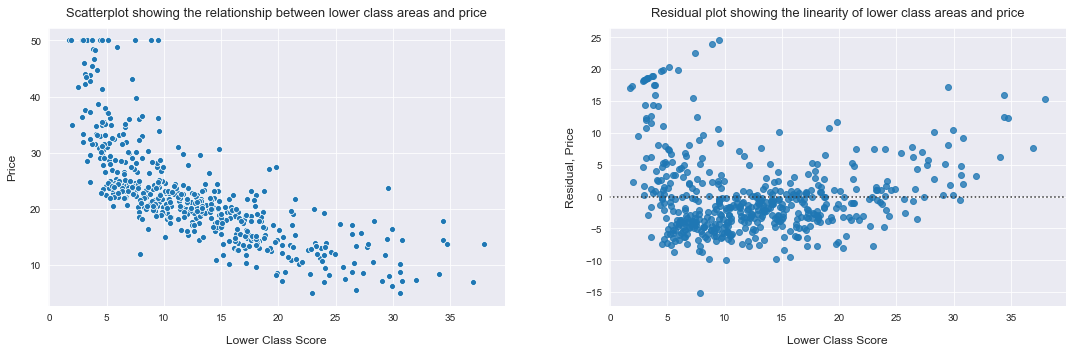

In [32]:
# scatter plot of lower class areas with pricing
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.scatterplot(df['LSTAT'], df['PRICE'])
plt.title('Scatterplot showing the relationship between lower class areas and price', 
          pad=12,
          size=13)
plt.xlabel('Lower Class Score', labelpad=13, size=12)
plt.ylabel('Price', labelpad=13, size=12)

# residual plot showing linearity
plt.subplot(1, 2, 2)
sns.residplot(df['LSTAT'], df['PRICE'])
plt.title('Residual plot showing the linearity of lower class areas and price', 
          pad=12,
          size=13)
plt.xlabel('Lower Class Score', labelpad=13, size=12)
plt.ylabel('Residual, Price', labelpad=10, size=12)

plt.tight_layout(w_pad=4)
plt.show()

### *'LSTAT' seems to have a non-linear relationship with price since datapoints are scatter unevenly around the x axis where resdiuals = 0. This is indicating to more of a polynomial regression model. The Polynomial Regression should be used with Ridge or Lasso regression (regularization penalty) for the best results.*

#### Number of Rooms analysis 

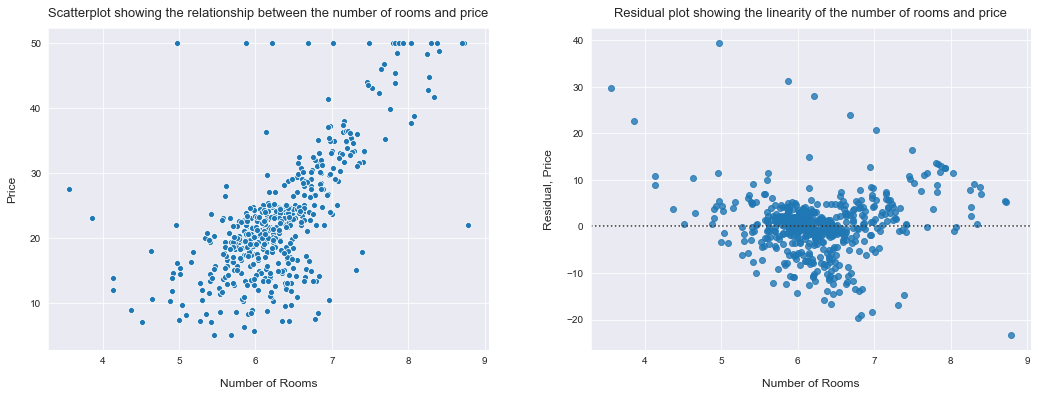

In [40]:
# scatter plot showing relationship between the number room areas and house price
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.scatterplot(df['RM'], df['PRICE'])
plt.title('Scatterplot showing the relationship between the number of rooms and price', 
          pad=12,
          size=13)
plt.xlabel('Number of Rooms', labelpad=13, size=12)
plt.ylabel('Price', labelpad=13, size=12)

# residual plot of rooms and price
plt.subplot(1, 2, 2)
sns.residplot(df['RM'], df['PRICE'])
plt.title('Residual plot showing the linearity of the number of rooms and price', 
          pad=12,
          size=13)
plt.xlabel('Number of Rooms', labelpad=13, size=12)
plt.ylabel('Residual, Price', labelpad=13, size=12)
plt.tight_layout(pad=2.5)
plt.show()

### *'RM' seems to be positively correlated with house price. By analyzing the residual plot, it is evident that a linear relationship exist, however, there are multiple outliers.  Thus, the median-absolute-error will be imperative for evaluation.*

####  Charles River Analysis 

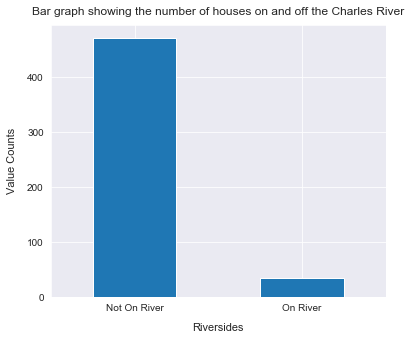

On the Charles River:  28.44
Off the Charles River:  22.0938
Difference:  6.3462


In [49]:
# bar plot showing the amount of houses on and off the Charles River
fig, ax1 = plt.subplots(figsize=(6,5))
df['CHAS'].value_counts().plot(kind='bar',
                              rot=0, 
                              ax=ax1)
ax1.set_xticklabels(['Not On River', 'On River'])
ax1.set_xlabel('Riversides', labelpad=10, size=11)
ax1.set_ylabel('Value Counts', labelpad=10, size=11)
ax1.set_title('Bar graph showing the number of houses on and off the Charles River', pad=10)
plt.show()

# average prices of house on and off the river

# on river dataframe
on_river = df[df['CHAS']==1.0]
# on river average prices
on_river_average = on_river['PRICE'].mean()

# off river dataframe
off_river = df[df['CHAS']==0.0]
# off river prices
off_river_average = off_river['PRICE'].mean()

# difference between on ands off river housing prices
diff = on_river_average - off_river_average

print('On the Charles River: ', round(on_river_average,4))
print('Off the Charles River: ', round(off_river_average, 4))
print('Difference: ', round(diff,4))

# Building the linear regression model

In [50]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

### Feature Selection

In [51]:
# features 
X = df.drop(columns=['PRICE'])
# target
Y = df['PRICE']

print(X.shape)
print(Y.shape)

(506, 13)
(506,)


### Splitting data for training and testing sets

In [52]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# showing shape of training and testing data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(379, 13) (379,)
(127, 13) (127,)


## Linear Regression Model

In [54]:
# linear regression object fitted with training data
linreg = LinearRegression().fit(x_train, y_train)
# prediction
yhat = linreg.predict(x_test)

# storing results in dataframe
results = pd.DataFrame({'Test Set':y_test, 
                        'Predictions': yhat})
results.reset_index(drop=True, inplace=True)
results.head(5)

,Test Set,Predictions
0,22.6,24.952333
1,50.0,23.616997
2,23.0,29.205886
3,8.3,11.960705
4,21.2,21.333620


#### Linear Model Evaluation

In [56]:
# r2 score (test accuracy)
r2 = round(r2_score(y_test, yhat) * 100, 4)

# mean-square-error
mse = round(mean_squared_error(y_test, yhat), 4)

# mean-absolute error
mae = round(mean_absolute_error(y_test, yhat), 4)

# median absolute error
med_abs_error = round(median_absolute_error(y_test, yhat), 4)

print('R2 score: ', r2)
print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('Median absolute error: ', med_abs_error)

R2 score:  63.5464
Mean squared error:  29.7822
Mean absolute error:  3.6683
Median absolute error:  2.6206


## Note on Linear Model  

The Model has not performed optimally since the r2 score (test accuracy) is at a relatively average score. The mean squared error is also slightly higher than what can be achieved, thus indicating that either a polynomial regression or better feature selection will be needed. 

# Polynomial Regression

In [57]:
# importing necessary library
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
# ridge and lasso regressions
from sklearn.linear_model import Lasso, Ridge

#### Transform features

In [58]:
# polynomial object 
poly = PolynomialFeatures(degree=2)
# fitting and transforming features
x_poly = poly.fit_transform(X)

#### Splitting transformed features

In [60]:
# splitting data set
x_train, x_test, y_train, y_test = train_test_split(x_poly, Y, test_size=0.25, random_state=0)
# showing shape of training and testing data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(379, 105) (379,)
(127, 105) (127,)


### Using polynomial features with Ridge and Lasso Regression for best accuracy    

  
  
1) Scale features using MinMaxScaler  
2) Find best alhpa and compare scores

#### Scaling using MinMaxScaler

In [62]:
# scale object
scale = MinMaxScaler()
# fit and transform training features
x_train_scaled = scale.fit_transform(x_train)
# transforming testing features
x_test_scaled = scale.transform(x_test)

### Ridge Regression on Polynomial Features

In [63]:
# ridge regression, finding best alpha
for a in [0.005, 0.01, 0.5, 1, 5]:
    
    # ridge object fitted with the scaled training data
    ridge = Ridge(alpha=a, max_iter=10000).fit(x_train_scaled, y_train)
    # predictions
    yhat = ridge.predict(x_test_scaled)
    # metrics for evaluation
    print('\n\nAlpha: ', a)
    print('\nR2 score: ', round(r2_score(y_test, yhat) * 100, 4))
    print('Mean squared error: ', round(mean_squared_error(y_test, yhat), 4))
    print('Mean absolute error: ', round(mean_absolute_error(y_test, yhat), 4))
    print('Median absolute error: ', round(median_absolute_error(y_test, yhat), 4))



Alpha:  0.005

R2 score:  66.2993
Mean squared error:  27.5332
Mean absolute error:  2.9811
Median absolute error:  1.8399


Alpha:  0.01

R2 score:  69.5003
Mean squared error:  24.9179
Mean absolute error:  2.9499
Median absolute error:  1.8638


Alpha:  0.5

R2 score:  75.1451
Mean squared error:  20.3062
Mean absolute error:  3.0542
Median absolute error:  2.09


Alpha:  1

R2 score:  72.9165
Mean squared error:  22.127
Mean absolute error:  3.2139
Median absolute error:  2.3638


Alpha:  5

R2 score:  67.057
Mean squared error:  26.9141
Mean absolute error:  3.5522
Median absolute error:  2.4646


### The ridge regression model performs optimally when alpha = 0.5.   

Metrics are:  

* R2 score:  75.1451  
* Mean squared error:  20.3062  
* Mean absolute error:  3.0542  
* Median absolute error:  2.09  

#### Final Ridge Model

In [64]:
# build final ridge 
ridge = Ridge(alpha=0.5, max_iter=10000).fit(x_train_scaled, y_train)
# predictions
yhat_ridge = ridge.predict(x_test_scaled)
# metrics
r2_ridge = round(r2_score(y_test, yhat_ridge) * 100, 4)
mse_ridge = round(mean_squared_error(y_test, yhat_ridge), 4)
mae_ridge = round(mean_absolute_error(y_test, yhat_ridge), 4)
med_abs_err_ridge = round(median_absolute_error(y_test, yhat_ridge), 4)

### Lasso Regression on Polynomial Features

In [65]:
# lasso regression, finding best alpha
for a in [0.005 ,0.01, 0.5, 1, 5]:
    
    # lasso object fitted with scaled training data
    lasso = Lasso(alpha=a, max_iter=10000).fit(x_train_scaled, y_train)
    # preditions
    yhat = lasso.predict(x_test_scaled)
    # metrics for evaluation
    print('\n\nAlpha: ', a)
    print('\nR2 score: ', round(r2_score(y_test, yhat) * 100, 4))
    print('Mean squared error: ', round(mean_squared_error(y_test, yhat), 4))
    print('Mean absolute error: ', round(mean_absolute_error(y_test, yhat), 4))
    print('Median absolute error: ', round(median_absolute_error(y_test, yhat), 4))



Alpha:  0.005

R2 score:  77.441
Mean squared error:  18.4305
Mean absolute error:  2.8722
Median absolute error:  2.0163


Alpha:  0.01

R2 score:  76.7388
Mean squared error:  19.0042
Mean absolute error:  2.9354
Median absolute error:  2.2067


Alpha:  0.5

R2 score:  46.9329
Mean squared error:  43.3553
Mean absolute error:  4.4388
Median absolute error:  2.9442


Alpha:  1

R2 score:  26.3211
Mean squared error:  60.1949
Mean absolute error:  5.2909
Median absolute error:  3.7518


Alpha:  5

R2 score:  -0.1119
Mean squared error:  81.7905
Mean absolute error:  6.2628
Median absolute error:  4.0087


### The lasso regression model performs optimally when alhpa = 0.005.  
 
Metrics are:  

* R2 score:  77.441  
* Mean squared error:  18.4305  
* Mean absolute error:  2.8722  
* Median absolute error:  2.0163  

#### Final Lasso Model

In [66]:
# build final ridge 
lasso = Lasso(alpha=0.005, max_iter=10000).fit(x_train_scaled, y_train)
# predictions
yhat_lasso = lasso.predict(x_test_scaled)
# metrics
r2_lasso = round(r2_score(y_test, yhat_lasso) * 100, 4)
mse_lasso = round(mean_squared_error(y_test, yhat_lasso), 4)
mae_lasso = round(mean_absolute_error(y_test, yhat_lasso), 4)
med_abs_err_lasso = round(median_absolute_error(y_test, yhat_lasso), 4)

## Comparing Ridge vs Lasso

In [73]:
# creating dataframe for easy comparisons
new_df = pd.DataFrame({'Ridge': [r2_ridge, mse_ridge, mae_ridge, med_abs_err_ridge],
                      'Lasso': [r2_lasso, mse_lasso, mae_lasso, med_abs_err_lasso]}, 
                     index=['R2', 'MSE', 'MAE', 'Median AE'])
new_df

,Ridge,Lasso
R2,75.1451,77.4410
MSE,20.3062,18.4305
MAE,3.0542,2.8722
Median AE,2.0900,2.0163


# Conclusion  

Following the requirements, the model that had to be created would have a high accuracy, low median absolute error, as well as low mean squared and mean absolute errors. This is achieved by fitting the data with Polynomial Features and then applying a Lasso Regression Model to the data.  

Metrics on Final Lasso Regression Model:  

* R2 score: 77.441
* Mean squared error: 18.4305
* Mean absolute error: 2.8722
* Median absolute error: 2.0163  